In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv('/Users/genie/Desktop/titanic/train.csv')
df_test=pd.read_csv('/Users/genie/Desktop/titanic/test.csv')

In [3]:
df_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


a) 
True
True
True
False

In [4]:
df1=df_train[(df_train.Parch == 0)]
len(df1)/len(df_train)

0.7609427609427609

In [5]:
df2=df_train[(df_train.SibSp != 0)]
len(df2)/len(df_train)

0.3176206509539843

In [6]:
df3=df_train[(df_train.Fare >= 500)]
len(df3)/len(df_train)

0.003367003367003367

In [7]:
df4=df_train[(df_train.Age >= 65)]
len(df4)/len(df_train)

0.012345679012345678

b)

In [8]:
def fill_nas(df):
    df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    return(df)

In [9]:
df_train2=fill_nas(df_train)
df_train_poly=df_train2.copy()
df_train2[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df_test2=fill_nas(df_test)
df_test_poly=df_test2.copy()
df_test2[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


c)

In [11]:
def data_prep(df):
    conditions = [
    (df['Age'] <= 16),
    (df['Age'] > 16) & (df['Age'] <= 32),
    (df['Age'] > 32) & (df['Age'] <= 48),
    (df['Age'] > 48) & (df['Age'] <= 64),
    (df['Age'] > 64) & (df['Age'] <= 100)
    ]
    values = ['1', '2', '3', '4', '5']
    df['AgeRange'] = np.select(conditions, values)
    conditions2 = [
    (df['Fare'] <= 7.9),
    (df['Fare'] > 7.9) & (df['Fare'] <= 14.5),
    (df['Fare'] > 14.5) & (df['Fare'] <= 31),
    (df['Fare'] > 31) & (df['Fare'] <= 600)
    ]
    values2 = ['1', '2', '3', '4']
    df['FareRange'] = np.select(conditions2, values2)
    df['Size']=df['SibSp']+df['Parch']
    df=df.drop(['SibSp','Parch','Age','Fare'],axis=1)
    df['Alone'] = np.where(df['Size'] == 0, 1, 0)
    print(df.dtypes)
    df=pd.get_dummies(df, columns = ['Sex','Embarked','AgeRange','FareRange'], drop_first=True)
    return(df)

In [12]:
df_train3=data_prep(df_train2)
df_train3[:5]

Survived      int64
Pclass        int64
Sex          object
Embarked     object
AgeRange     object
FareRange    object
Size          int64
Alone         int64
dtype: object


,Survived,Pclass,Size,Alone,Sex_male,Embarked_Q,Embarked_S,AgeRange_2,AgeRange_3,AgeRange_4,AgeRange_5,FareRange_2,FareRange_3,FareRange_4
0,0,3,1,0,1,0,1,1,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,1,0,0,0,0,1
2,1,3,0,1,0,0,1,1,0,0,0,1,0,0
3,1,1,1,0,0,0,1,0,1,0,0,0,0,1
4,0,3,0,1,1,0,1,0,1,0,0,1,0,0


In [13]:
df_test3=data_prep(df_test2)
df_test3[:5]

Pclass        int64
Sex          object
Embarked     object
AgeRange     object
FareRange    object
Size          int64
Alone         int64
dtype: object


,Pclass,Size,Alone,Sex_male,Embarked_Q,Embarked_S,AgeRange_2,AgeRange_3,AgeRange_4,AgeRange_5,FareRange_2,FareRange_3,FareRange_4
0,3,0,1,1,1,0,0,1,0,0,0,0,0
1,3,1,0,0,0,1,0,1,0,0,0,0,0
2,2,0,1,1,1,0,0,0,1,0,1,0,0
3,3,0,1,1,0,1,1,0,0,0,1,0,0
4,3,2,0,0,0,1,1,0,0,0,1,0,0


d)

In [14]:
x=df_train3.drop(['Survived'],axis=1)
y=df_train3['Survived']
x.head()

,Pclass,Size,Alone,Sex_male,Embarked_Q,Embarked_S,AgeRange_2,AgeRange_3,AgeRange_4,AgeRange_5,FareRange_2,FareRange_3,FareRange_4
0,3,1,0,1,0,1,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,0,0,1
2,3,0,1,0,0,1,1,0,0,0,1,0,0
3,1,1,0,0,0,1,0,1,0,0,0,0,1
4,3,0,1,1,0,1,0,1,0,0,1,0,0


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,stratify=y,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train[['Pclass','Size','Alone']])
x_train_scaled=x_train.copy()
x_train_scaled[['Pclass','Size','Alone']]=scaler.transform(x_train[['Pclass','Size','Alone']])
x_test_scaled=x_test.copy()
x_test_scaled[['Pclass','Size','Alone']]=scaler.transform(x_test[['Pclass','Size','Alone']])
df_test3_scaled=df_test3.copy()
df_test3_scaled[['Pclass','Size','Alone']]=scaler.transform(df_test3[['Pclass','Size','Alone']])
x_train_scaled[:5]

,Pclass,Size,Alone,Sex_male,Embarked_Q,Embarked_S,AgeRange_2,AgeRange_3,AgeRange_4,AgeRange_5,FareRange_2,FareRange_3,FareRange_4
671,-1.545630,0.085472,-1.252689,1,0,1,1,0,0,0,0,0,1
417,-0.356136,0.726992,-1.252689,0,0,1,1,0,0,0,1,0,0
634,0.833358,2.651550,-1.252689,0,0,1,0,0,0,0,0,1,0
323,-0.356136,0.726992,-1.252689,0,0,1,1,0,0,0,0,1,0
379,0.833358,-0.556048,0.798282,1,0,1,1,0,0,0,0,0,0


In [17]:
x_knn=x[['Pclass','Size','Alone']].copy()
x_knn[:5]

,Pclass,Size,Alone
0,3,1,0
1,1,1,0
2,3,0,1
3,1,1,0
4,3,0,1


In [18]:
df_test_knn=df_test3[['Pclass','Size','Alone']].copy()
df_test_knn[:5]

,Pclass,Size,Alone
0,3,0,1
1,3,1,0
2,2,0,1
3,3,0,1
4,3,2,0


In [19]:
x_train_knn, x_test_knn, y_train_knn, y_test_knn=train_test_split(x_knn,y,stratify=y,random_state=0)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()
scaler2.fit(x_train_knn)
x_train_knn_scaled=scaler2.transform(x_train_knn)
x_test_knn_scaled=scaler2.transform(x_test_knn)
df_test_knn_scaled=scaler2.transform(df_test_knn)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params1={'n_neighbors':list(range(1,21))}
knn=KNeighborsClassifier()
grid_search1=GridSearchCV(knn,param_grid=params1,
                        cv=5,
                        return_train_score=True)
grid_search1.fit(x_train_knn_scaled,y_train_knn)
best_neighbors=grid_search1.best_estimator_.n_neighbors
print(best_neighbors)

15


In [22]:
best_knn=KNeighborsClassifier(n_neighbors=best_neighbors)
best_knn.fit(x_train_knn_scaled, y_train_knn)
best_knn.score(x_test_knn_scaled, y_test_knn)

0.6547085201793722

In [23]:
from sklearn.svm import SVC
params2={'kernel':['linear','poly','rbf','sigmoid'],
        'C':[0.01,0.1,1,10,100],
        'gamma':[0.5,1,2,3,4]}
svc=SVC()
grid_search2=GridSearchCV(svc,param_grid=params2,
                        cv=5,
                        return_train_score=True)
grid_search2.fit(x_train_scaled,y_train)
best_C=grid_search2.best_estimator_.C
best_kernel=grid_search2.best_estimator_.kernel
best_gamma=grid_search2.best_estimator_.gamma
print(best_C)
print(best_kernel)
print(best_gamma)

0.1
poly
0.5


In [24]:
best_svc=SVC(C=best_C,kernel=best_kernel,gamma=best_gamma)
best_svc.fit(x_train_scaled, y_train)
best_svc.score(x_test_scaled, y_test)

0.8026905829596412

In [25]:
from sklearn.linear_model import LogisticRegression
params3={'C':list(10**np.linspace(0,20,21))}
logistic=LogisticRegression(solver='lbfgs',max_iter=1000)
grid_search3=GridSearchCV(logistic,param_grid=params3,
                        cv=5,
                        return_train_score=True)
grid_search3.fit(x_train,y_train)
best_C2=grid_search3.best_estimator_.C
print(best_C2)

1.0


In [26]:
best_logistic=LogisticRegression(C=best_C2,solver='lbfgs',max_iter=1000)
best_logistic.fit(x_train, y_train)
best_logistic.score(x_test, y_test)

0.7892376681614349

In [27]:
from sklearn.ensemble import RandomForestClassifier
params4={'max_features':list(range(1,14,2)),
       'max_depth':list(range(4,9,2)),
         'n_estimators':[100,300,500]}
forest=RandomForestClassifier(random_state=0)
grid_search4=GridSearchCV(forest,param_grid=params4,
                        cv=5,
                        return_train_score=True)
grid_search4.fit(x_train,y_train.values.ravel())
best_features=grid_search4.best_estimator_.max_features
best_depth=grid_search4.best_estimator_.max_depth
best_estimators=grid_search4.best_estimator_.n_estimators
print(best_features)
print(best_depth)
print(best_estimators)

11
8
300


In [28]:
best_forest=RandomForestClassifier(max_features=best_features,n_estimators=best_estimators,max_depth=best_depth,random_state=0)
best_forest.fit(x_train,y_train.values.ravel())
best_forest.score(x_test,y_test)

0.7757847533632287

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
params5={'learning_rate':[0.01, 0.05, 0.1, 0.15, 0.2],
        'max_depth':list(range(4,9,2)),
        'n_estimators':[10,25,50]}
gradient=GradientBoostingClassifier(random_state=0)
grid_search5=GridSearchCV(gradient,param_grid=params5,
                        cv=5,
                        return_train_score=True)
grid_search5.fit(x_train,y_train)
best_rate=grid_search5.best_estimator_.learning_rate
best_depth2=grid_search5.best_estimator_.max_depth
best_estimators2=grid_search5.best_estimator_.n_estimators
print(best_rate)
print(best_depth2)
print(best_estimators2)

0.05
8
10


In [30]:
best_gradient=GradientBoostingClassifier(learning_rate=best_rate,n_estimators=best_estimators2,max_depth=best_depth2,random_state=0)
best_gradient.fit(x_train,y_train)
best_gradient.score(x_test,y_test)

0.7533632286995515

In [31]:
from sklearn.neural_network import MLPClassifier
params6={'hidden_layer_sizes':[[5],[5,5],[5,5,5],[10],[10,10],[10,10,10]],
        'activation':['identity','logistic','tanh','relu']}
mlp=MLPClassifier(max_iter=2000,random_state=0)
grid_search6=GridSearchCV(mlp,param_grid=params6,
                        cv=5,
                        return_train_score=True)
grid_search6.fit(x_train_scaled,y_train)
best_layer=grid_search6.best_estimator_.hidden_layer_sizes
best_activation=grid_search6.best_estimator_.activation
print(best_layer)
print(best_activation)

[5]
tanh


In [32]:
best_mlp=MLPClassifier(random_state=0,max_iter=2000,hidden_layer_sizes=best_layer,activation=best_activation)
best_mlp.fit(x_train_scaled,y_train)
best_mlp.score(x_test_scaled,y_test)

0.8071748878923767

In [33]:
df_train_poly['Sex']=np.where(df_train_poly['Sex']=='male',1,0)
df_train_poly['Size']=df_train_poly['SibSp']+df_train_poly['Parch']
df_train_poly=df_train_poly.drop(['Embarked','SibSp','Parch'],axis=1)
print(df_train_poly.dtypes)
df_train_poly[:5]

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
Size          int64
dtype: object


,Survived,Pclass,Sex,Age,Fare,Size
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0


In [34]:
x_poly=df_train_poly.drop(['Survived'],axis=1)
y_poly=df_train_poly['Survived']
x_poly[:5]

,Pclass,Sex,Age,Fare,Size
0,3,1,22.0,7.2500,1
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,0
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [35]:
df_test_poly['Sex']=np.where(df_test_poly['Sex']=='male',1,0)
df_test_poly['Size']=df_test_poly['SibSp']+df_test_poly['Parch']
df_test_poly=df_test_poly.drop(['Embarked','SibSp','Parch'],axis=1)
print(df_test_poly.dtypes)
df_test_poly[:5]

Pclass      int64
Sex         int64
Age       float64
Fare      float64
Size        int64
dtype: object


,Pclass,Sex,Age,Fare,Size
0,3,1,34.5,7.8292,0
1,3,0,47.0,7.0000,1
2,2,1,62.0,9.6875,0
3,3,1,27.0,8.6625,0
4,3,0,22.0,12.2875,2


In [36]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly=train_test_split(x_poly,y_poly,stratify=y_poly,random_state=0)

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
x_train_poly2=poly.fit_transform(x_train_poly)
x_test_poly2=poly.fit_transform(x_test_poly)
df_test_poly2=poly.fit_transform(df_test_poly)

In [38]:
x_train_poly2=pd.DataFrame(x_train_poly2,columns=poly.get_feature_names(x_train_poly.columns))
x_train_poly2[:5]

,1,Pclass,Sex,Age,Fare,Size,Pclass^2,Pclass Sex,Pclass Age,Pclass Fare,...,Sex^2,Sex Age,Sex Fare,Sex Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2
0,1.0,1.0,1.0,31.0,52.000,1.0,1.0,1.0,31.0,52.000,...,1.0,31.0,52.000,1.0,961.0,1612.000,31.0,2704.000000,52.0,1.0
1,1.0,2.0,0.0,18.0,13.000,2.0,4.0,0.0,36.0,26.000,...,0.0,0.0,0.000,0.0,324.0,234.000,36.0,169.000000,26.0,4.0
2,1.0,3.0,0.0,9.0,27.900,5.0,9.0,0.0,27.0,83.700,...,0.0,0.0,0.000,0.0,81.0,251.100,45.0,778.410000,139.5,25.0
3,1.0,2.0,0.0,22.0,29.000,2.0,4.0,0.0,44.0,58.000,...,0.0,0.0,0.000,0.0,484.0,638.000,44.0,841.000000,58.0,4.0
4,1.0,3.0,1.0,19.0,7.775,0.0,9.0,3.0,57.0,23.325,...,1.0,19.0,7.775,0.0,361.0,147.725,0.0,60.450625,0.0,0.0


In [39]:
x_train_poly2=x_train_poly2.drop('1',axis=1)
x_train_poly2[:5]

,Pclass,Sex,Age,Fare,Size,Pclass^2,Pclass Sex,Pclass Age,Pclass Fare,Pclass Size,Sex^2,Sex Age,Sex Fare,Sex Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2
0,1.0,1.0,31.0,52.000,1.0,1.0,1.0,31.0,52.000,1.0,1.0,31.0,52.000,1.0,961.0,1612.000,31.0,2704.000000,52.0,1.0
1,2.0,0.0,18.0,13.000,2.0,4.0,0.0,36.0,26.000,4.0,0.0,0.0,0.000,0.0,324.0,234.000,36.0,169.000000,26.0,4.0
2,3.0,0.0,9.0,27.900,5.0,9.0,0.0,27.0,83.700,15.0,0.0,0.0,0.000,0.0,81.0,251.100,45.0,778.410000,139.5,25.0
3,2.0,0.0,22.0,29.000,2.0,4.0,0.0,44.0,58.000,4.0,0.0,0.0,0.000,0.0,484.0,638.000,44.0,841.000000,58.0,4.0
4,3.0,1.0,19.0,7.775,0.0,9.0,3.0,57.0,23.325,0.0,1.0,19.0,7.775,0.0,361.0,147.725,0.0,60.450625,0.0,0.0


In [40]:
x_test_poly2=pd.DataFrame(x_test_poly2,columns=poly.get_feature_names(x_test_poly.columns))
x_test_poly2[:5]

,1,Pclass,Sex,Age,Fare,Size,Pclass^2,Pclass Sex,Pclass Age,Pclass Fare,...,Sex^2,Sex Age,Sex Fare,Sex Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2
0,1.0,2.0,1.0,42.0,13.0000,0.0,4.0,2.0,84.0,26.0000,...,1.0,42.0,13.0000,0.0,1764.0,546.0000,0.0,169.000000,0.0000,0.0
1,1.0,3.0,1.0,4.0,11.1333,2.0,9.0,3.0,12.0,33.3999,...,1.0,4.0,11.1333,2.0,16.0,44.5332,8.0,123.950369,22.2666,4.0
2,1.0,3.0,1.0,9.0,31.3875,6.0,9.0,3.0,27.0,94.1625,...,1.0,9.0,31.3875,6.0,81.0,282.4875,54.0,985.175156,188.3250,36.0
3,1.0,2.0,1.0,60.0,39.0000,2.0,4.0,2.0,120.0,78.0000,...,1.0,60.0,39.0000,2.0,3600.0,2340.0000,120.0,1521.000000,78.0000,4.0
4,1.0,1.0,1.0,49.0,56.9292,1.0,1.0,1.0,49.0,56.9292,...,1.0,49.0,56.9292,1.0,2401.0,2789.5308,49.0,3240.933813,56.9292,1.0


In [41]:
x_test_poly2=x_test_poly2.drop('1',axis=1)
x_test_poly2[:5]

,Pclass,Sex,Age,Fare,Size,Pclass^2,Pclass Sex,Pclass Age,Pclass Fare,Pclass Size,Sex^2,Sex Age,Sex Fare,Sex Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2
0,2.0,1.0,42.0,13.0000,0.0,4.0,2.0,84.0,26.0000,0.0,1.0,42.0,13.0000,0.0,1764.0,546.0000,0.0,169.000000,0.0000,0.0
1,3.0,1.0,4.0,11.1333,2.0,9.0,3.0,12.0,33.3999,6.0,1.0,4.0,11.1333,2.0,16.0,44.5332,8.0,123.950369,22.2666,4.0
2,3.0,1.0,9.0,31.3875,6.0,9.0,3.0,27.0,94.1625,18.0,1.0,9.0,31.3875,6.0,81.0,282.4875,54.0,985.175156,188.3250,36.0
3,2.0,1.0,60.0,39.0000,2.0,4.0,2.0,120.0,78.0000,4.0,1.0,60.0,39.0000,2.0,3600.0,2340.0000,120.0,1521.000000,78.0000,4.0
4,1.0,1.0,49.0,56.9292,1.0,1.0,1.0,49.0,56.9292,1.0,1.0,49.0,56.9292,1.0,2401.0,2789.5308,49.0,3240.933813,56.9292,1.0


In [42]:
df_test_poly2=pd.DataFrame(df_test_poly2,columns=poly.get_feature_names(df_test_poly.columns))
df_test_poly2[:5]

,1,Pclass,Sex,Age,Fare,Size,Pclass^2,Pclass Sex,Pclass Age,Pclass Fare,...,Sex^2,Sex Age,Sex Fare,Sex Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2
0,1.0,3.0,1.0,34.5,7.8292,0.0,9.0,3.0,103.5,23.4876,...,1.0,34.5,7.8292,0.0,1190.25,270.1074,0.0,61.296373,0.000,0.0
1,1.0,3.0,0.0,47.0,7.0000,1.0,9.0,0.0,141.0,21.0000,...,0.0,0.0,0.0000,0.0,2209.00,329.0000,47.0,49.000000,7.000,1.0
2,1.0,2.0,1.0,62.0,9.6875,0.0,4.0,2.0,124.0,19.3750,...,1.0,62.0,9.6875,0.0,3844.00,600.6250,0.0,93.847656,0.000,0.0
3,1.0,3.0,1.0,27.0,8.6625,0.0,9.0,3.0,81.0,25.9875,...,1.0,27.0,8.6625,0.0,729.00,233.8875,0.0,75.038906,0.000,0.0
4,1.0,3.0,0.0,22.0,12.2875,2.0,9.0,0.0,66.0,36.8625,...,0.0,0.0,0.0000,0.0,484.00,270.3250,44.0,150.982656,24.575,4.0


In [43]:
df_test_poly2=df_test_poly2.drop('1',axis=1)
df_test_poly2[:5]

,Pclass,Sex,Age,Fare,Size,Pclass^2,Pclass Sex,Pclass Age,Pclass Fare,Pclass Size,Sex^2,Sex Age,Sex Fare,Sex Size,Age^2,Age Fare,Age Size,Fare^2,Fare Size,Size^2
0,3.0,1.0,34.5,7.8292,0.0,9.0,3.0,103.5,23.4876,0.0,1.0,34.5,7.8292,0.0,1190.25,270.1074,0.0,61.296373,0.000,0.0
1,3.0,0.0,47.0,7.0000,1.0,9.0,0.0,141.0,21.0000,3.0,0.0,0.0,0.0000,0.0,2209.00,329.0000,47.0,49.000000,7.000,1.0
2,2.0,1.0,62.0,9.6875,0.0,4.0,2.0,124.0,19.3750,0.0,1.0,62.0,9.6875,0.0,3844.00,600.6250,0.0,93.847656,0.000,0.0
3,3.0,1.0,27.0,8.6625,0.0,9.0,3.0,81.0,25.9875,0.0,1.0,27.0,8.6625,0.0,729.00,233.8875,0.0,75.038906,0.000,0.0
4,3.0,0.0,22.0,12.2875,2.0,9.0,0.0,66.0,36.8625,6.0,0.0,0.0,0.0000,0.0,484.00,270.3250,44.0,150.982656,24.575,4.0


In [44]:
grid_search7=GridSearchCV(forest,param_grid=params4,
                        cv=5,
                        return_train_score=True)
grid_search7.fit(x_train_poly2,y_train_poly.values.ravel())
best_features7=grid_search7.best_estimator_.max_features
best_depth7=grid_search7.best_estimator_.max_depth
best_estimators7=grid_search7.best_estimator_.n_estimators
print(best_features7)
print(best_depth7)
print(best_estimators7)

1
6
300


In [45]:
best_poly=RandomForestClassifier(max_features=best_features7,n_estimators=best_estimators7,max_depth=best_depth7,random_state=0)
best_poly.fit(x_train_poly2,y_train_poly.values.ravel())
best_poly.score(x_test_poly2,y_test_poly)

0.8116591928251121

In [46]:
knn_pred=best_knn.predict(df_test_knn_scaled)
test_knn=df_test['PassengerId'].copy()
test_knn=pd.DataFrame(test_knn)
test_knn['Survived']=knn_pred
test_knn.to_csv("/Users/genie/Desktop/test_knn.csv",index=None)

In [47]:
svc_pred=best_svc.predict(df_test3_scaled)
test_svc=df_test['PassengerId'].copy()
test_svc=pd.DataFrame(test_svc)
test_svc['Survived']=svc_pred
test_svc.to_csv("/Users/genie/Desktop/test_svc.csv",index=None)

In [48]:
logistic_pred=best_logistic.predict(df_test3)
test_logistic=df_test['PassengerId'].copy()
test_logistic=pd.DataFrame(test_logistic)
test_logistic['Survived']=logistic_pred
test_logistic.to_csv("/Users/genie/Desktop/test_logistic.csv",index=None)

In [49]:
forest_pred=best_forest.predict(df_test3)
test_forest=df_test['PassengerId'].copy()
test_forest=pd.DataFrame(test_forest)
test_forest['Survived']=forest_pred
test_forest.to_csv("/Users/genie/Desktop/test_forest.csv",index=None)

In [50]:
gradient_pred=best_gradient.predict(df_test3)
test_gradient=df_test['PassengerId'].copy()
test_gradient=pd.DataFrame(test_gradient)
test_gradient['Survived']=gradient_pred
test_gradient.to_csv("/Users/genie/Desktop/test_gradient.csv",index=None)

In [51]:
mlp_pred=best_mlp.predict(df_test3_scaled)
test_mlp=df_test['PassengerId'].copy()
test_mlp=pd.DataFrame(test_mlp)
test_mlp['Survived']=mlp_pred
test_mlp.to_csv("/Users/genie/Desktop/test_mlp.csv",index=None)

In [52]:
poly_pred=best_poly.predict(df_test_poly2)
test_poly=df_test['PassengerId'].copy()
test_poly=pd.DataFrame(test_poly)
test_poly['Survived']=poly_pred
test_poly.to_csv("/Users/genie/Desktop/test_poly.csv",index=None)

e) Kaggle name: Jeannie Gao Date:12/04/2020 Score: 0.78229

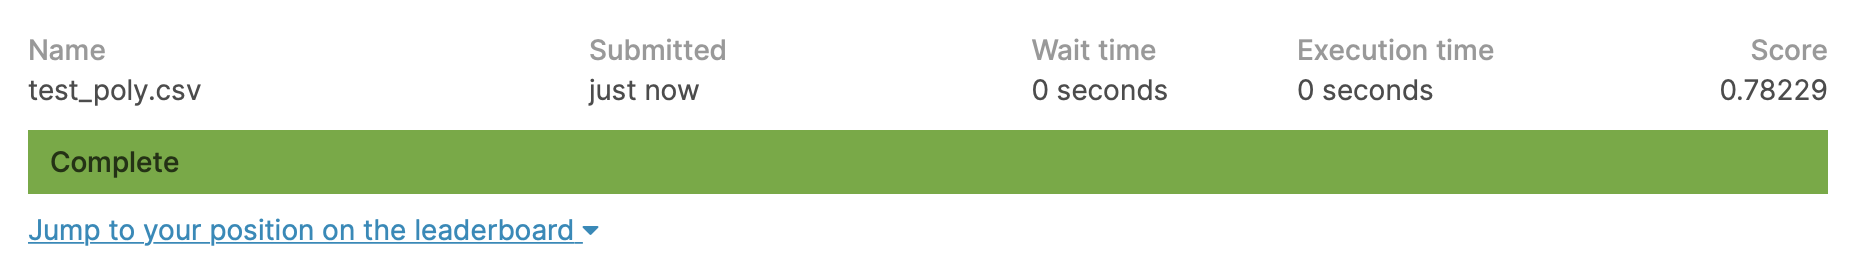